In [1]:
import requests
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time

In [2]:
train_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
test_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes"

In [3]:
train_df = pd.read_csv(train_url, header = None)
test_df = pd.read_csv(test_url, header = None)

In [4]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [5]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [6]:
train_lbl_df = train_df[64]

In [7]:
train_img_df = train_df.drop([64], axis = 1)

In [8]:
train_lbl_df.head()

0    0
1    0
2    7
3    4
4    6
Name: 64, dtype: int64

In [9]:
train_img_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0


In [10]:
test_lbl_df = test_df[64]
test_img_df = test_df.drop([64], axis = 1)

In [11]:
test_lbl_df.head()

0    0
1    1
2    2
3    3
4    4
Name: 64, dtype: int64

In [12]:
test_img_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
2,0,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
3,0,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0


In [13]:
train_img = train_img_df.as_matrix()
test_img = test_img_df.as_matrix()
train_lbl = train_lbl_df.as_matrix()
test_lbl = test_lbl_df.as_matrix()

In [14]:
print(train_img.shape)
print(test_img.shape)
print(train_lbl.shape)
print(test_lbl.shape)

(3823, 64)
(1797, 64)
(3823,)
(1797,)


In [15]:
clf = LogisticRegression()

In [16]:
start_time = time.time()
clf.fit(train_img, train_lbl)
end_time = time.time()
print("Training finished in {} seconds".format(end_time - start_time))

Training finished in 0.5691182613372803 seconds


In [17]:
test_score = clf.score(test_img, test_lbl)
print("Accuracy on test data: {}".format(test_score))

Accuracy on test data: 0.9471341124095715


In [16]:
reg = LogisticRegression()

In [17]:
parameters = {'penalty':('l1', 'l2'), 'C':[0.001,0.01,0.1,1,10,100]}

In [18]:
start_time = time.time()
clf = GridSearchCV(reg, parameters)
clf.fit(train_img, train_lbl)
end_time = time.time()
print("Training finished in {} seconds".format(end_time - start_time))

Training finished in 95.61135125160217 seconds


In [19]:
print("Best score on training data: {}".format(clf.best_score_))

Best score on training data: 0.9628563955009155


In [20]:
print("Best params for SVM classificator:")
print(clf.best_params_)

Best params for SVM classificator:
{'C': 0.1, 'penalty': 'l2'}


In [21]:
test_score = clf.score(test_img, test_lbl)
print("Accuracy on test data: {}".format(test_score))

Accuracy on test data: 0.9499165275459098


In [22]:
pred_lbl = clf.predict(test_img)

In [23]:
mean_abs_err = mean_absolute_error(test_lbl, pred_lbl)
print("Mean absolute error: {}".format(mean_abs_err))

Mean absolute error: 0.21480244852532


In [24]:
mean_squared_err = mean_squared_error(test_lbl, pred_lbl)
print("Mean squared error: {}".format(mean_squared_err))

Mean squared error: 1.2142459654980524


In [25]:
r2_scr = r2_score(test_lbl, pred_lbl)
print("R2 score: {}".format(r2_scr))

R2 score: 0.8520186216205629


In [26]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(test_lbl, pred_lbl)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_lbl, pred_lbl))


Classification report for classifier GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99       178
          1       0.90      0.93      0.92       182
          2       0.99      0.97      0.98       177
          3       0.97      0.93      0.95       183
          4       0.97      0.97      0.97       181
          5       0.91      0.98      0.94       182
          6       0.99      0.98      0

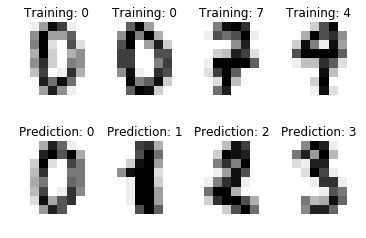

In [33]:
from matplotlib import pyplot as plt
first_train_img = train_img[:4].reshape((4, 8, 8))
first_train_lbl = train_lbl[:4]
images_and_labels = list(zip(first_train_img, first_train_lbl))
for index, (image, label) in enumerate(images_and_labels):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    
first_test_img = test_img[:4].reshape((4, 8, 8))
first_test_lbl = test_lbl[:4]
images_and_predictions = list(zip(first_test_img, first_test_lbl))
for index, (image, prediction) in enumerate(images_and_predictions):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()